In [6]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

Using event file: events\both\events.out.tfevents.1748383102.Charled.76128.0


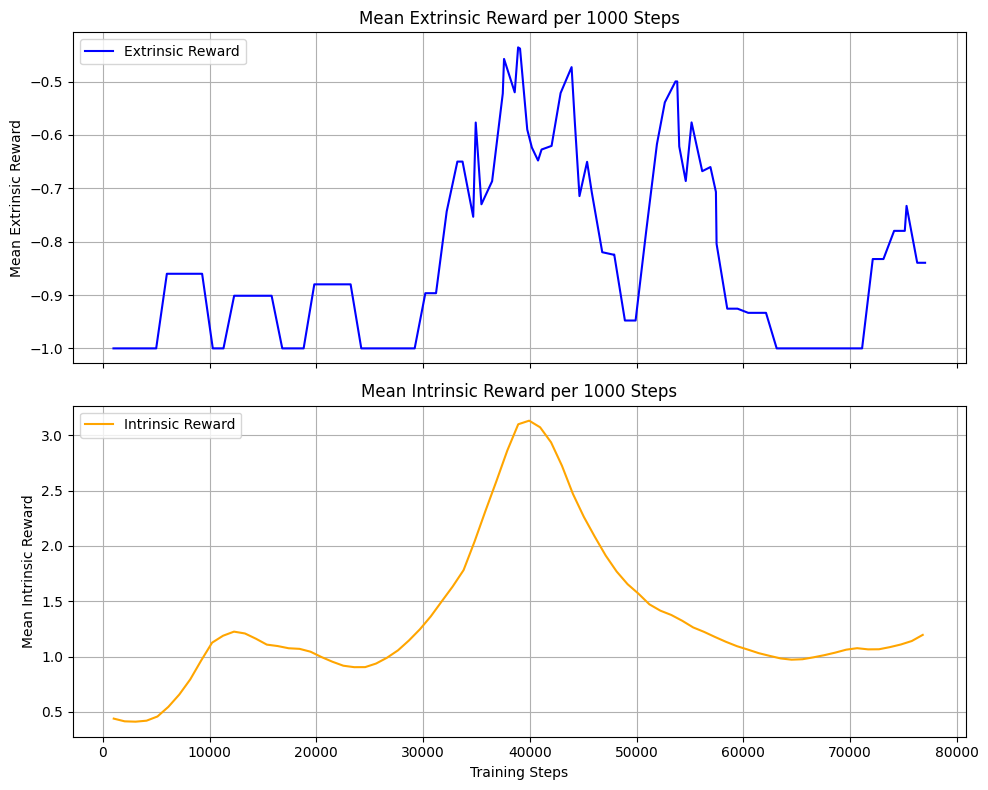

In [25]:
import os
import glob
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def plot_last_event_rewards(reward_mode='both'):
    event_dir = os.path.join('events', reward_mode)
    # Find all event files in the directory
    event_files = glob.glob(os.path.join(event_dir, 'events.out.tfevents.*'))
    
    # Pick the latest event file
    event_files = glob.glob(os.path.join(event_dir, 'events.out.tfevents.*'))
    if len(event_files) < 2:
        print(f"Not enough event files found in {event_dir}")
        return
    event_path = sorted(event_files, key=os.path.getctime)[-2]
    print(f"Using event file: {event_path}")

    # Load TensorBoard event data
    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()

    # Extract scalar data
    extr_events = ea.Scalars('Mean_extr_reward_per_1000_steps')
    intr_events = ea.Scalars('Mean_intr_reward_per_1000_steps')

    # Convert to lists
    steps_extr = [e.step for e in extr_events]
    values_extr = [e.value for e in extr_events]
    steps_intr = [e.step for e in intr_events]
    values_intr = [e.value for e in intr_events]

    # COnvert to a running average
    def running_average(values, window_size=5):
        return [sum(values[i:i + window_size]) / window_size for i in range(len(values) - window_size + 1)]
    values_extr = running_average(values_extr)
    values_intr = running_average(values_intr)
    steps_extr = steps_extr[:len(values_extr)]
    steps_intr = steps_intr[:len(values_intr)]

    # Plot with two subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Extrinsic reward subplot
    axs[0].plot(steps_extr, values_extr, label='Extrinsic Reward', color='blue')
    axs[0].set_ylabel('Mean Extrinsic Reward')
    axs[0].set_title('Mean Extrinsic Reward per 1000 Steps')
    axs[0].grid(True)
    axs[0].legend(loc='upper left')

    # Intrinsic reward subplot
    axs[1].plot(steps_intr, values_intr, label='Intrinsic Reward', color='orange')
    axs[1].set_xlabel('Training Steps')
    axs[1].set_ylabel('Mean Intrinsic Reward')
    axs[1].set_title('Mean Intrinsic Reward per 1000 Steps')
    axs[1].grid(True)
    axs[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()
    
plot_last_event_rewards('both')        # or 'intrinsic', 'extrinsic'